In [15]:
import pandas as pd   
import matplotlib.pyplot as plt    
from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv('Mall_Customers.csv')

In [17]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [19]:
sse = [] 
for i in range(1, 11):  
    km = KMeans(n_clusters=i, random_state= 42)  
    km.fit(x)  
    sse.append(km.inertia_)   

C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

Text(0, 0.5, 'Sum of squared distance')

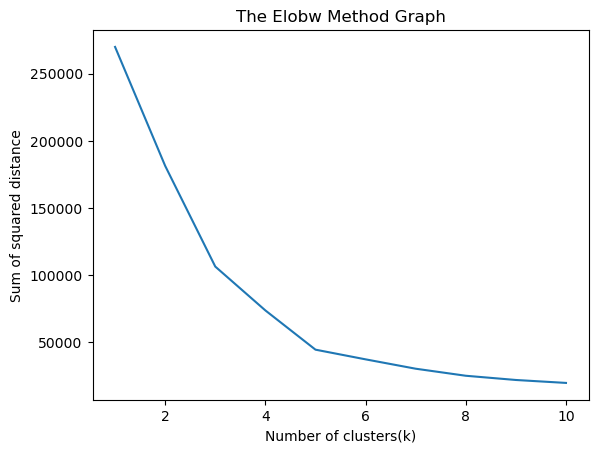

In [20]:
x = range(1,11)
y = sse
plt.plot(range(1, 11), sse)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('Sum of squared distance')  

In [23]:
kmeans = KMeans(n_clusters=3, random_state= 42)  
y_predict= kmeans.fit_predict(x)  

C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


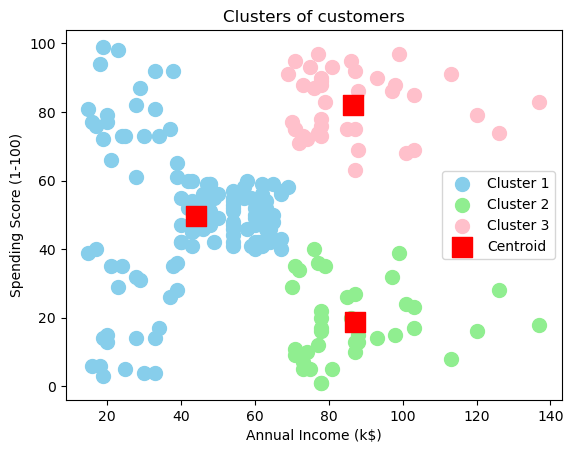

In [24]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, color = 'skyblue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'lightgreen', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'pink', label = 'Cluster 3') #for third cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroid', marker='s')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()   

In [25]:
clustered_result = pd.DataFrame({'Customer': data['CustomerID'], 'Cluster': y_predict})

In [26]:
clustered_result

,Customer,Cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
195,196,2
196,197,1
197,198,2
198,199,1


In [27]:
clustered_result['Cluster'].value_counts()

Cluster
0    123
2     39
1     38
Name: count, dtype: int64

In [32]:
data['Cluster1'] = y_predict

In [33]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,1,1
